In [1]:
import bib_mahjong as bib
import matplotlib.pyplot as plt
import numpy as np

# Classement actuel

Modifiez la valeur ci-dessous pour modifier le nombre de joueurs affichés dans le classement. Seuls les scores des personnes ayant fait strictement plus de parties que la valeur seuil seront affichés. Toutes les parties sont prises en compte.

In [11]:
#===========================================================
#=======           Instructions modifiables          =======
#===========================================================
seuil_nb_parties = 30


#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================
#--- Calcul et affichage du classement ---
classement = bib.get_classement(seuil_nb_parties)
print('----------------------------------------------')
print('----------------- Classement -----------------')
print('----------------------------------------------')
for i in range(len(classement)) :
    nom, score, nb_parties = classement[i]
    print("{num_partie:>2}. {nom:<14} {score:>5} pts   ({nb:>3} parties)".format(num_partie=i+1, nom=nom, score=score, nb=nb_parties))

----------------------------------------------
----------------- Classement -----------------
----------------------------------------------
 1. Jasmine         5688 pts   (216 parties)
 2. Dwarf           5344 pts   (169 parties)
 3. Elsa             480 pts   (104 parties)
 4. Bean            -168 pts   (168 parties)
 5. Florence        -240 pts   ( 98 parties)
 6. Ben             -352 pts   ( 33 parties)
 7. Pierre-Alain   -2432 pts   (106 parties)
 8. Luc            -2744 pts   ( 71 parties)
 9. Flo            -4456 pts   (174 parties)


# Evolution des scores (toutes les parties)

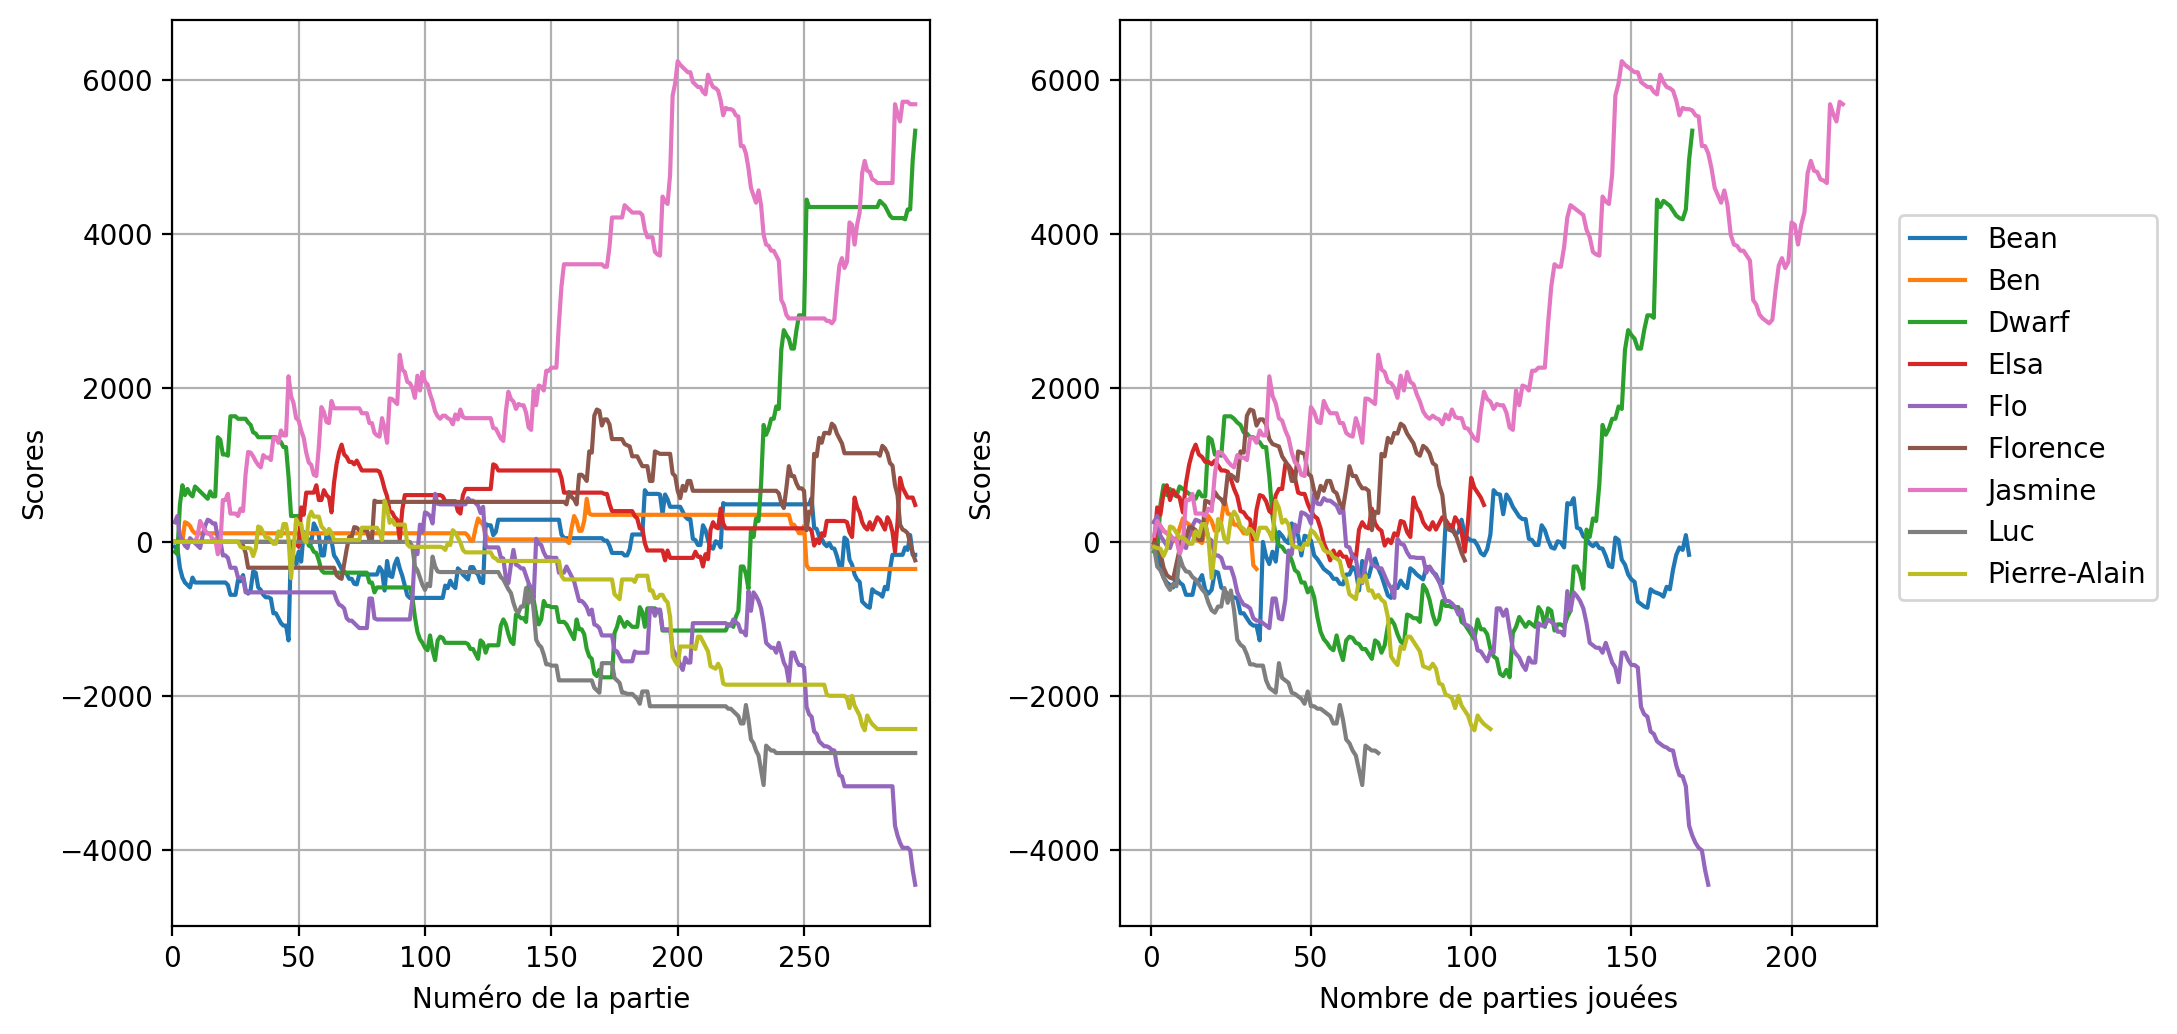

In [3]:
#===========================================================
#=======           Instructions modifiables          =======
#===========================================================
#--- Nombre minimal de parties à avoir fait pour que la courbe du joueur soit représentée ---
seuil_nb_parties = 30

#--- Liste des joueurs à mettre en gras sur le graphique ---
L_gras = []   # Ajouter les noms des joueurs (str) dans la liste


#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================
#--- Création d'une liste des joueurs ayant joué plus de seuil_nb_parties parties ---
L_joueurs = bib.creer_liste_joueurs()
for joueur in L_joueurs.copy() :
    if bib.calcul_nb_parties(joueur) <= seuil_nb_parties :
        L_joueurs.remove(joueur)

#--- Déclaration de la figure ---
fig = plt.figure(figsize=(11,6),dpi=200)
fig.subplots_adjust(wspace=0.25)

#--- Tracé du graphique en fonction du numéro de la partie ---
ax = plt.subplot(1,2,1)
L_num_partie = []       # axe des abscisses
for joueur in L_joueurs :
    L_scores = bib.calcul_score_joueur_total(joueur)
    if L_num_partie == [] :
        L_num_partie = [(i+1) for i in range(len(L_scores))]
    if joueur in L_gras :
        larg = 3
    else :
        larg = 1.5
    plt.plot(L_num_partie, L_scores, lw=larg, label=joueur)
plt.xlim(0,L_num_partie[-1]*1.02)
plt.ylabel("Scores")
plt.xlabel("Numéro de la partie")
plt.grid()

#--- Tracé du graphique en fonction du nombre de parties jouées par le joueur ---
ax = plt.subplot(1,2,2)
for joueur in L_joueurs :
    L_scores = bib.calcul_score_joueur_total_2(joueur)
    L_nb_partie = [(i+1) for i in range(len(L_scores))]
    if joueur in L_gras :
        larg = 3
    else :
        larg = 1.5
    plt.plot(L_nb_partie, L_scores, lw=larg, label=joueur)
plt.ylabel("Scores")
plt.xlabel("Nombre de parties jouées")
plt.grid()

plt.legend(bbox_to_anchor=(1.01, 0.8))

plt.show()

# Classement et évolution des scores d'un groupe de 4 joueurs
## Liste de tous les groupes

In [4]:
#===========================================================
#=======           Instructions modifiables          =======
#===========================================================
#--- Nomnbre minimal de parties du groupe pour qu'il soit affiché ---
seuil_nb_parties = 0   


#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================        
L_groupes, len_max = bib.get_groupes(seuil_nb_parties)
print('---------------------------------------------')
print('--------- Liste de tous les groupes ---------')
print('---------------------------------------------')
for i in range(len(L_groupes)) :
    j1, j2, j3, j4, = L_groupes[i][0]
    nb_parties = L_groupes[i][1]
    print("{num_gr:>3}. {j1:<14} {j2:<14} {j3:<14} {j4:<14}   ({nb:>3} parties)".format(num_gr=i+1, j1=j1, j2=j2, j3=j3, j4=j4, nb=nb_parties))

---------------------------------------------
--------- Liste de tous les groupes ---------
---------------------------------------------
  1. Dwarf          Flo            Jasmine        Luc              ( 56 parties)
  2. Bean           Elsa           Jasmine        Pierre-Alain     ( 54 parties)
  3. Ben            Dwarf          Flo            Florence         ( 19 parties)
  4. Bean           Elsa           Flo            Florence         ( 16 parties)
  5. Bean           Dwarf          Jasmine        Pierre-Alain     ( 15 parties)
  6. Bean           Ben            Dwarf          Flo              ( 14 parties)
  7. Bean           Flo            Florence       Jasmine          ( 13 parties)
  8. Dwarf          Flo            Jasmine        Pyves            ( 12 parties)
  9. Dwarf          Flo            Florence       Jasmine          ( 10 parties)
 10. Bean           Jasmine        Pierre-Alain   Yann             (  8 parties)
 11. Bean           Dwarf          Elsa           Fl

## Sélection du groupe de 4 joueurs


----------------------------------------------
----------------- Classement -----------------
----------------------------------------------
Nb de parties du groupe : 54
 1. Jasmine         1712 pts
 2. Bean             392 pts
 3. Elsa             256 pts
 4. Pierre-Alain   -2360 pts


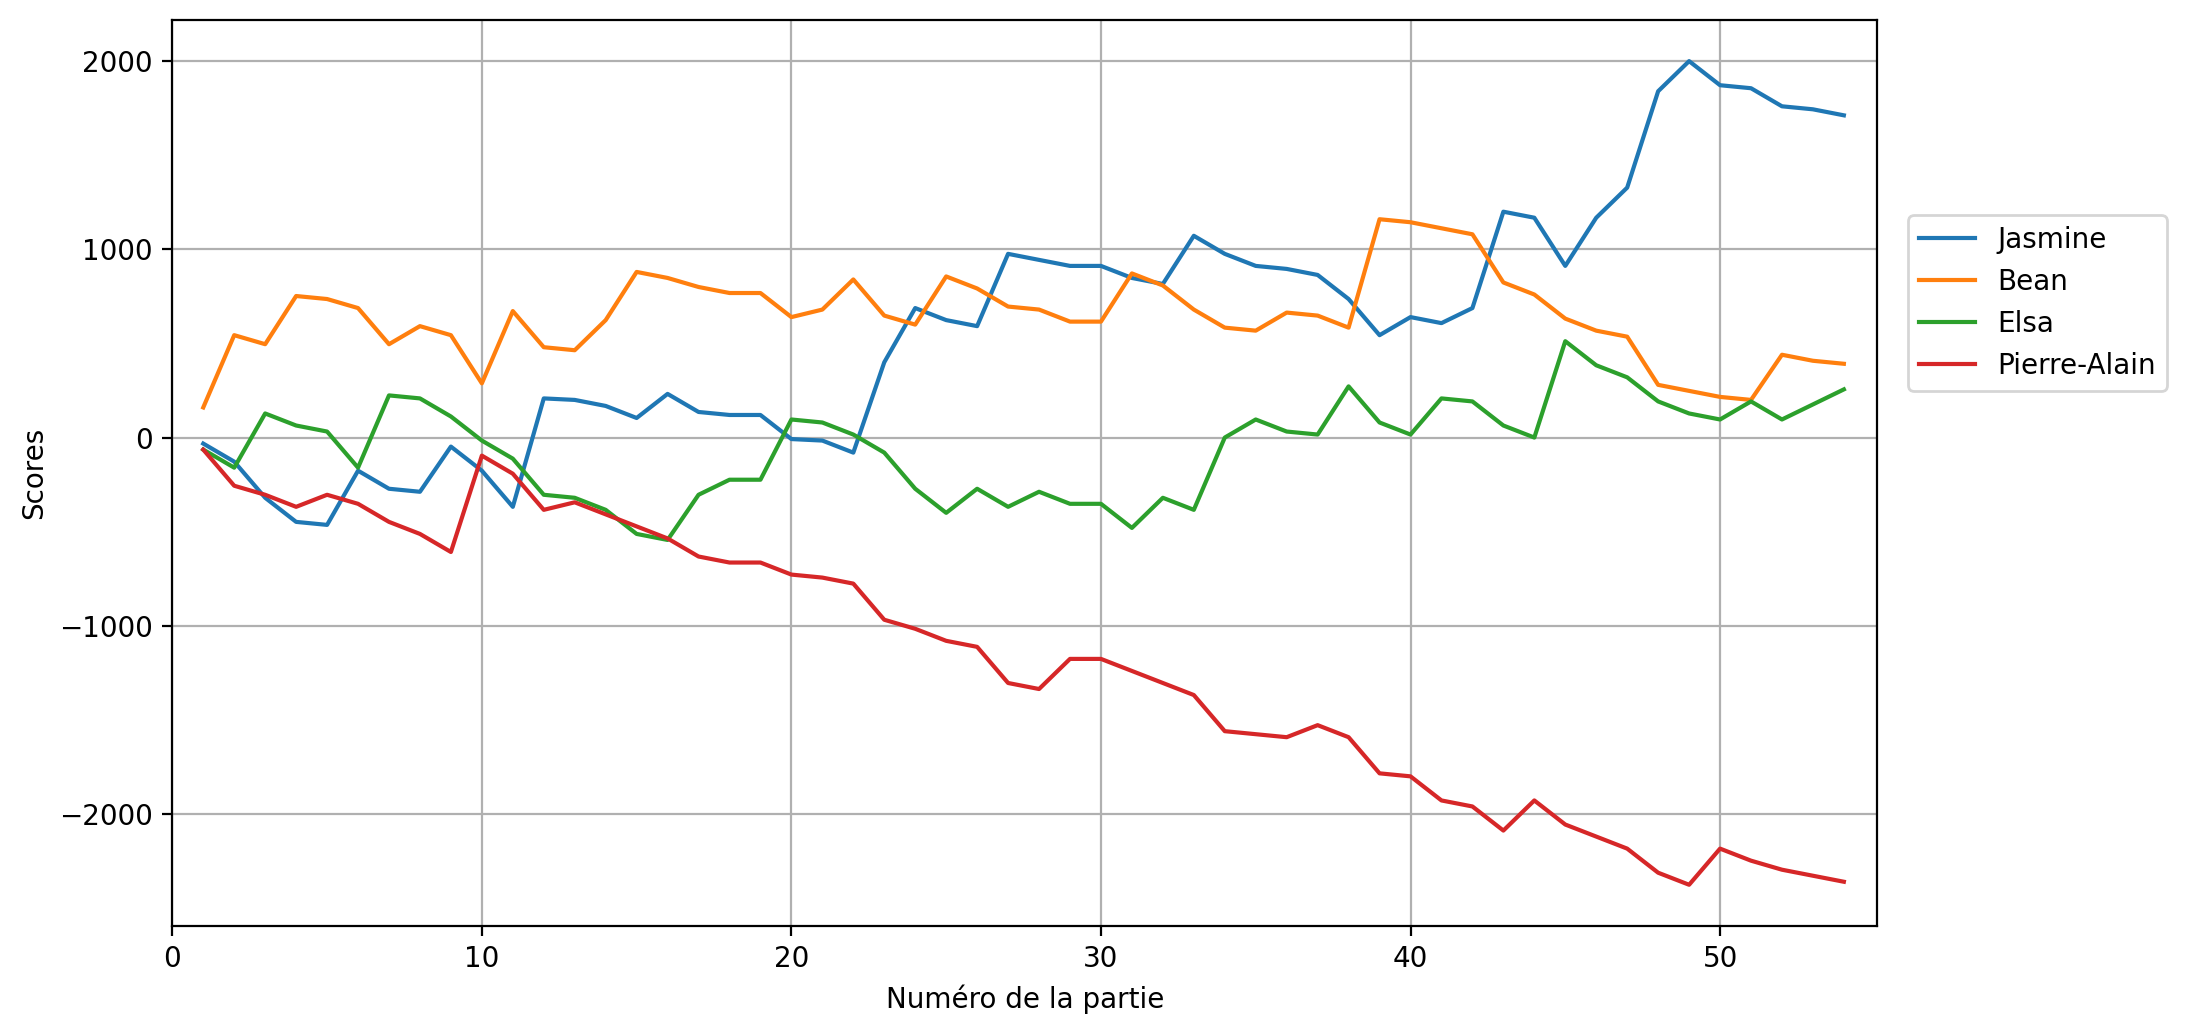

In [5]:
#===========================================================
#=======           Instructions modifiables          =======
#===========================================================
#--- Ajouter dans la liste les 4 joueurs du groupe ---
L_joueurs = ['Bean', 'Elsa', 'Jasmine', 'Pierre-Alain']    


#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================
#--- Vérification de l'ortographe des noms des joueurs ---
L_joueurs_tot = bib.creer_liste_joueurs()
for nom_joueur in L_joueurs :
    if nom_joueur not in L_joueurs_tot :
        print("Vérifiez l'orthographe du joueur '{0}'. Ce joueur n'est pas dans la base de données.".format(nom_joueur))

#--- Calcul et affichage du classement des 4 joueurs sélectionnés ---
nb_parties,L_scores = bib.get_classement_groupe(L_joueurs)
print('\n----------------------------------------------')
print('----------------- Classement -----------------')
print('----------------------------------------------')
if nb_parties == 0 :
    print("""{0}, {1}, {2} et {3} n'ont jamais joué ensemble.""".format(*L_joueurs))
else :
    print("Nb de parties du groupe :", nb_parties)
    for i in range(len(L_scores)) :
        print("{classement:>2}. {nom:<14} {score:>5} pts".format(classement=i+1, nom=L_scores[i][0], score=L_scores[i][1][-1]))
    
    #--- Tracé du graphique ---  
    fig = plt.figure(figsize=(11,6),dpi=200)
    ax = plt.subplot(1,1,1)

    L_num_partie = [(i+1) for i in range(nb_parties)]
    for nom_joueur,scores in L_scores :
        plt.plot(L_num_partie, scores, label=nom_joueur)
    plt.legend(bbox_to_anchor=(1.01, 0.8))
    plt.xlim(0,L_num_partie[-1]*1.02)
    plt.ylabel("Scores")
    plt.xlabel("Numéro de la partie")
    plt.grid()
    plt.show()

# Nombre de parties et de victoires

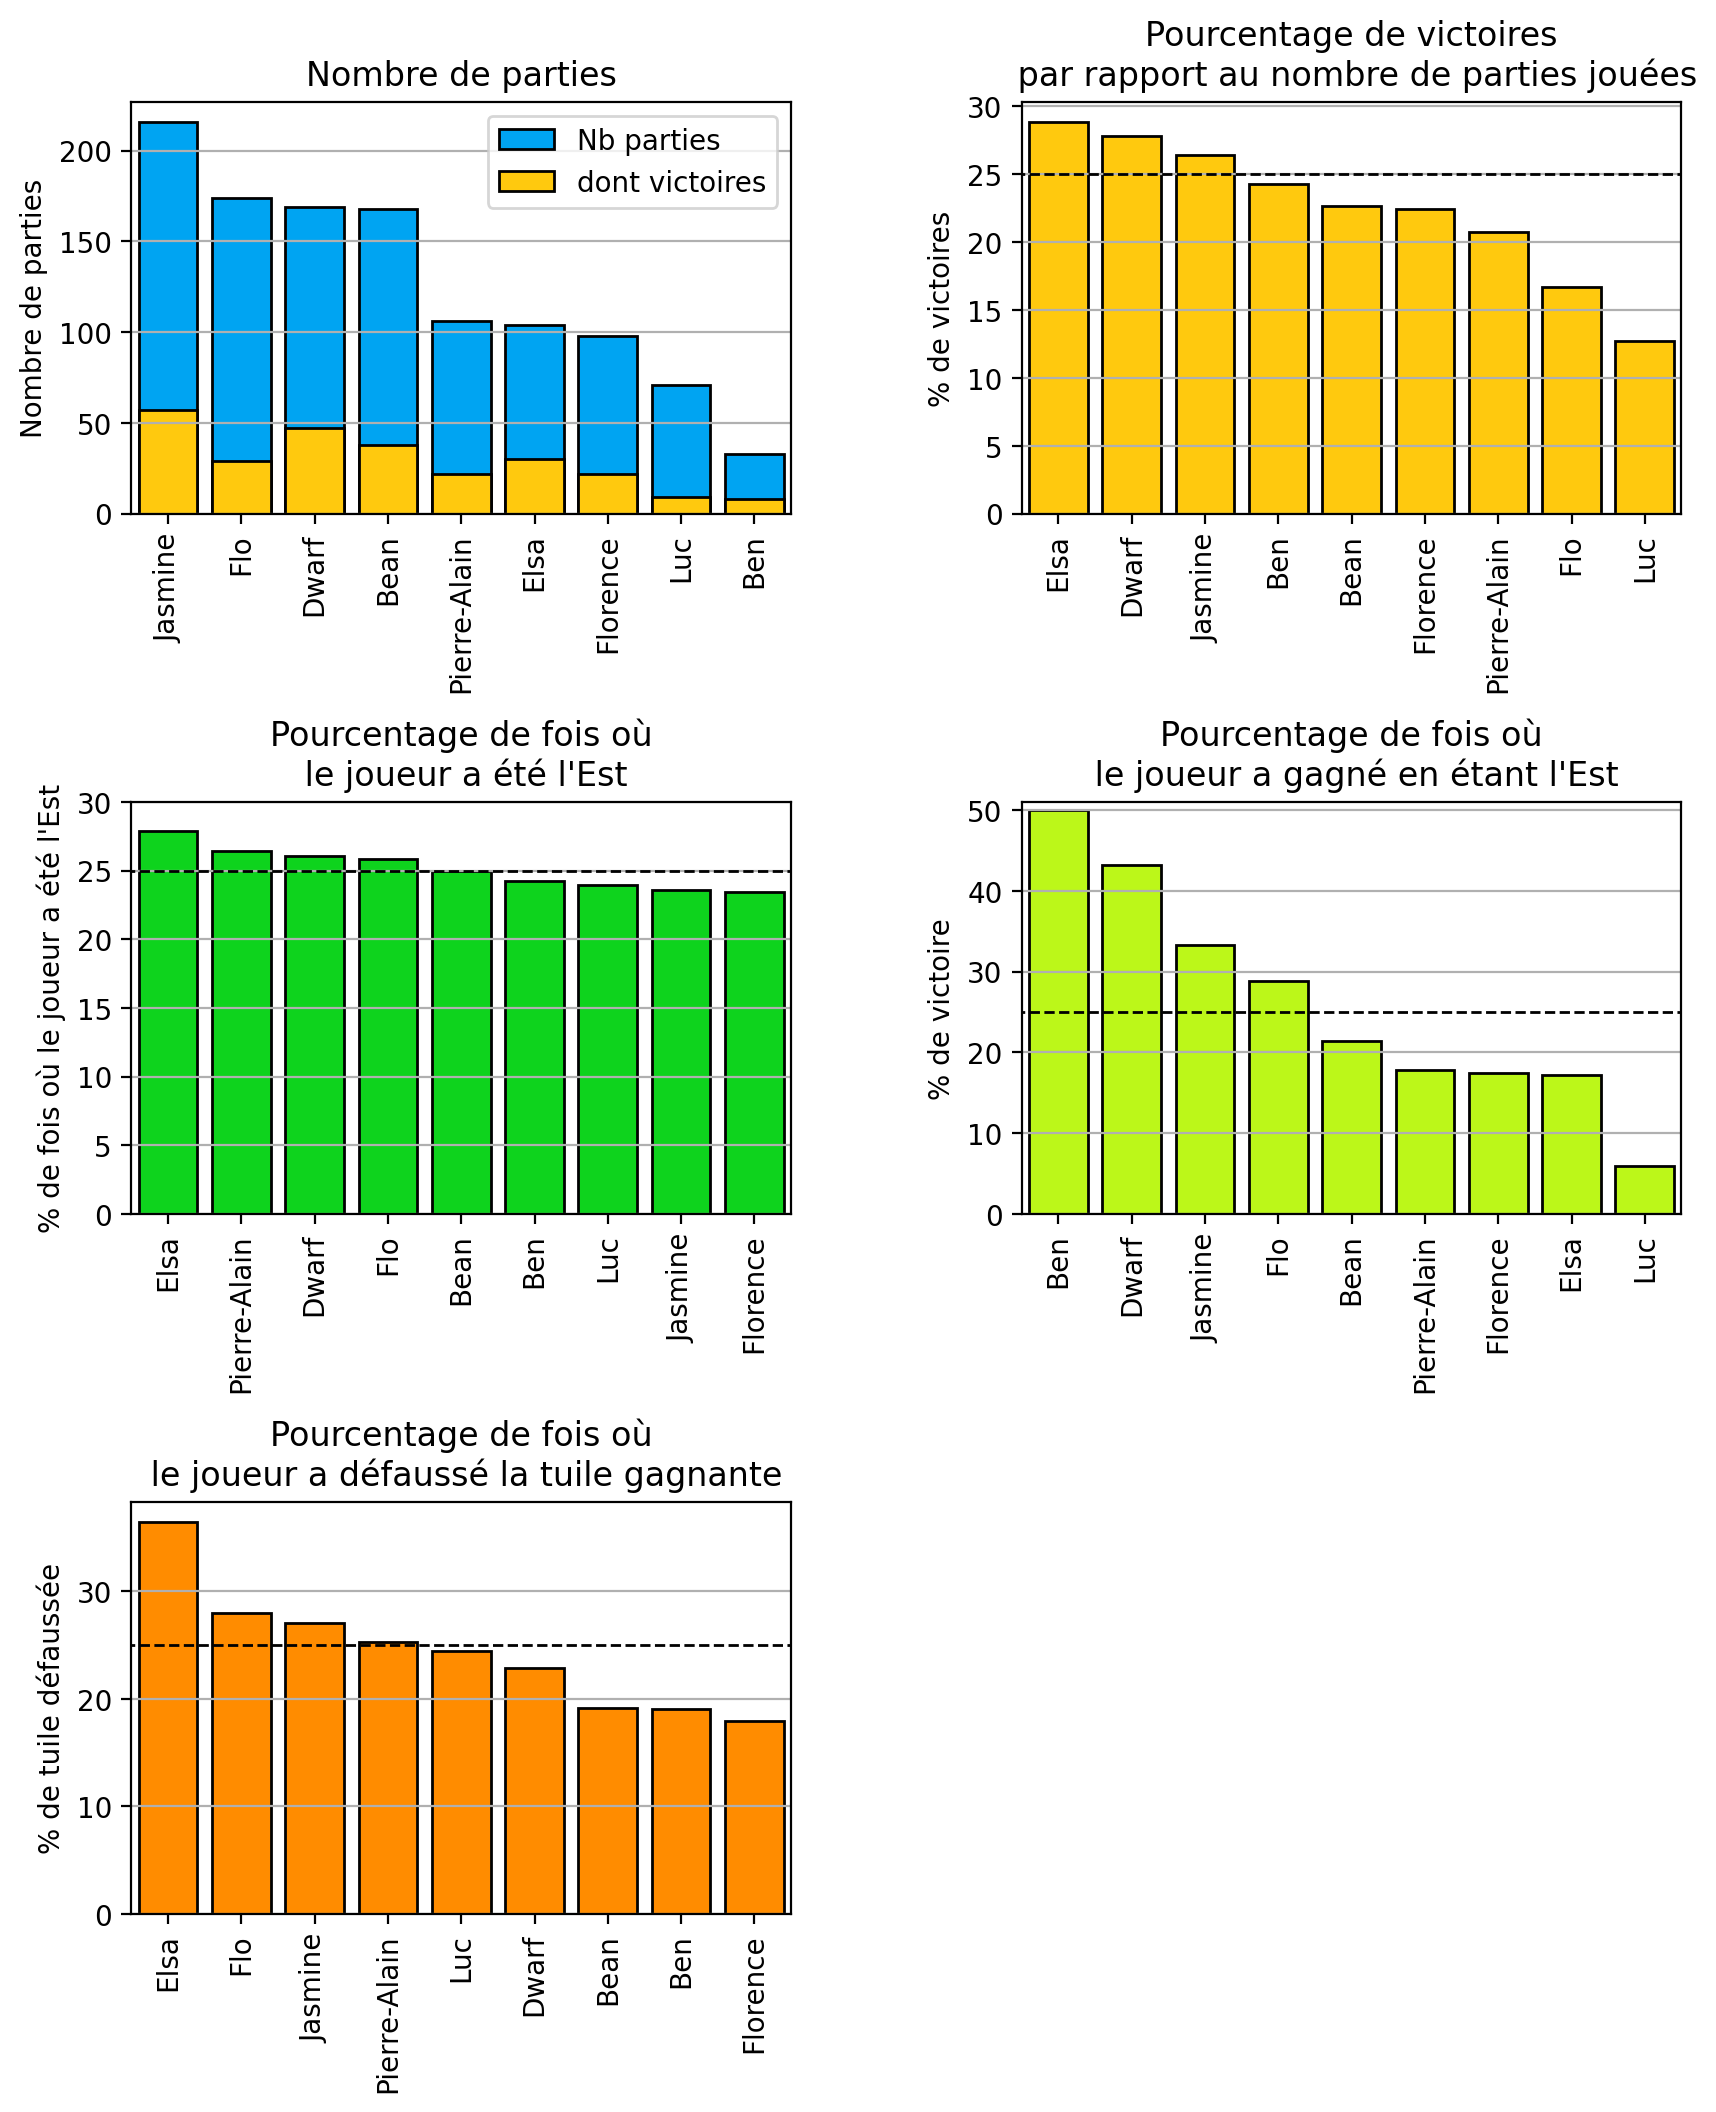

In [6]:
#===========================================================
#=======           Instructions modifiables          =======
#===========================================================
#--- Nombre minimal de parties à avoir fait pour que les statistiques du joueurs soient affichées ---
seuil_nb_parties = 30


#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================
#--- Calculs ---
D = bib.get_parties_victoires(seuil_nb_parties)

#--- Tracé des graphiques ---
fig = plt.figure(figsize=(10,12),dpi=200)
fig.subplots_adjust(wspace=0.35, hspace=0.7)

#--- Graphique n°1 : nombre de parties et de victoire ---
ax = plt.subplot(3,2,1)
# Création de la liste de données triées :
L = [[joueur, D[joueur][0], D[joueur][1]] for joueur in D]
L.sort(key=lambda c:-c[1])
# Création des labels des axes :
ind = np.arange(len(L))
label_nom = [L[i][0] for i in range(len(L))]
# Création du graphique en barres :
barWitdh = 0.8
ax.bar(ind, [L[i][1] for i in range(len(L))], width=barWitdh, align='center', color=[0,0.643,0.949], edgecolor='k', linewidth=1,label='Nb parties')
ax.bar(ind, [L[i][2] for i in range(len(L))], width=barWitdh, align='center', color=[1,0.788,0.055], edgecolor='k', linewidth=1,label='dont victoires')
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(label_nom, rotation = 90)
ax.set_xlim(-0.5,len(D)-0.5)
plt.grid(axis='y')
ax.legend(loc='upper right')
plt.ylabel("Nombre de parties")
plt.title("Nombre de parties")

#--- Graphique n°2 : Pourcentage de victoires ---
ax = plt.subplot(3,2,2)
# Création de la liste de données triées :
L = [[joueur, D[joueur][2]] for joueur in D]
L.sort(key=lambda c:-c[1])
# Création des labels des axes :
ind = np.arange(len(L))
label_nom = [L[i][0] for i in range(len(L))]
# Création du graphique en barres :
ax.bar(ind, [L[i][1] for i in range(len(L))], width=barWitdh, align='center', color=[1,0.788,0.055], edgecolor='k', linewidth=1,label='% victoire')
plt.plot([-1,len(L)],[25,25],"k--",linewidth=1)
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(label_nom, rotation = 90)
ax.set_xlim(-0.5,len(D)-0.5)
plt.grid(axis='y')
plt.ylabel("% de victoires")
plt.title("Pourcentage de victoires\n par rapport au nombre de parties jouées")

#--- Graphique n°3 : Pourcentage de fois l'Est ---
ax = plt.subplot(3,2,3)
# Création de la liste de données triées :
L = [[joueur, D[joueur][3]] for joueur in D]
L.sort(key=lambda c:-c[1])
# Création des labels des axes :
ind = np.arange(len(L))
label_nom = [L[i][0] for i in range(len(L))]
# Création du graphique en barres :
ax.bar(ind, [L[i][1] for i in range(len(L))], width=barWitdh, align='center', color=[0.055,0.827,0.114], edgecolor='k', linewidth=1,label='% Est')
plt.plot([-1,len(L)],[25,25],"k--",linewidth=1)
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(label_nom, rotation = 90)
ax.set_ylabel("% de fois où le joueur a été l'Est")
ax.set_ylim(0,30)
ax.set_xlim(-0.5,len(D)-0.5)
plt.grid(axis='y')
plt.title("Pourcentage de fois où\n le joueur a été l'Est")

#--- Graphique n°4 : Pourcentage de victoire en étant l'Est ---
ax = plt.subplot(3,2,4)
# Création de la liste de données triées :
L = [[joueur, D[joueur][5]] for joueur in D]
L.sort(key=lambda c:-c[1])
# Création des labels des axes :
ind = np.arange(len(L))
label_nom = [L[i][0] for i in range(len(L))]
# Création du graphique en barres :
ax.bar(ind, [L[i][1] for i in range(len(L))], width=barWitdh, align='center', color=[0.737,0.969,0.098], edgecolor='k', linewidth=1,label='% victoire')
plt.plot([-1,len(L)],[25,25],"k--",linewidth=1)
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(label_nom, rotation = 90)
ax.set_ylabel("% de victoire")
ax.set_ylim(0,51)
ax.set_xlim(-0.5,len(D)-0.5)
plt.grid(axis='y')
plt.title("Pourcentage de fois où\n le joueur a gagné en étant l'Est")

#--- Graphique n°5 : Pourcentage de tuiles défaussé ---
ax = plt.subplot(3,2,5)
# Création de la liste de données triées :
L = [[joueur, D[joueur][4]] for joueur in D]
L.sort(key=lambda c:-c[1])
# Création des labels des axes :
ind = np.arange(len(L))
label_nom = [L[i][0] for i in range(len(L))]
# Création du graphique en barres :
ax.bar(ind, [L[i][1] for i in range(len(L))], width=barWitdh, align='center', color='darkorange', edgecolor='k', linewidth=1)
plt.plot([-1,len(L)],[25,25],"k--",linewidth=1)
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(label_nom, rotation = 90)
ax.set_ylabel("% de tuile défaussée")
ax.set_xlim(-0.5,len(D)-0.5)
plt.grid(axis='y')
plt.title("Pourcentage de fois où\n le joueur a défaussé la tuile gagnante")

plt.show()

Dans le pourcentage de fois où le joueur a défaussé la tuile gagnante, les parties nulles ou gagnées à partir de la muraille ne sont pas prises en compte.

# Scénario de fin de parties

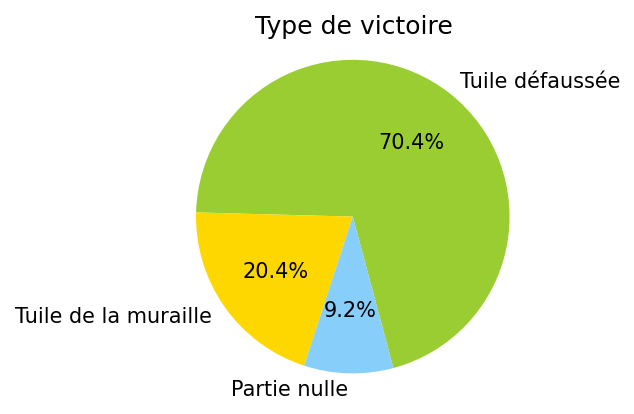

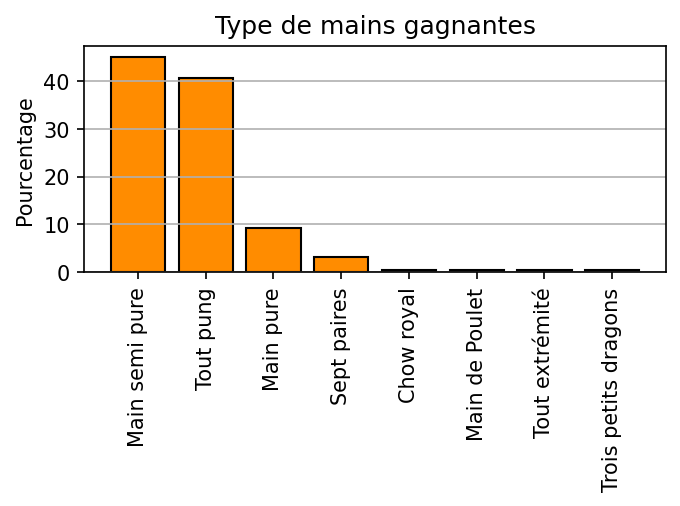

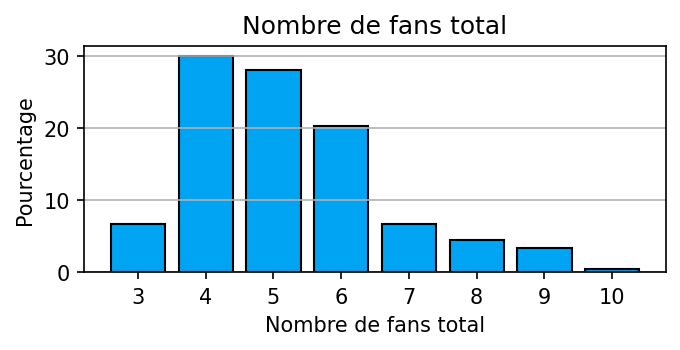

In [7]:
#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================

L_type_victoire, L_type_mains, L_nb_fan = bib.get_scenario_fin()

#--- Graphique n°1 : type de victoire ---
fig = plt.figure(figsize=(3,3),dpi=150)
ax = plt.subplot(1,1,1)
ax.set_title("Type de victoire")
labels = [t[0] for t in L_type_victoire]
sizes = [t[1] for t in L_type_victoire]
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', shadow=False, startangle=-75)
plt.axis('equal')
plt.show()


#--- Graphique n°2 : type de mains gagnantes ---
fig = plt.figure(figsize=(5,2),dpi=150)
L_type_mains.sort(key=lambda c:-c[1])
# Création des labels des axes :
ind = np.arange(len(L_type_mains))
label_nom = [L_type_mains[i][0] for i in range(len(L_type_mains))]
# Calcul de la somme du nombre de mains :
somme = sum([t[1] for t in L_type_mains])
# Création du graphique en barres :
ax = plt.subplot(1,1,1)
ax.set_title("Type de mains gagnantes")
barWitdh = 0.8
ax.bar(ind, [100*t[1]/somme for t in L_type_mains], width=barWitdh, align='center', color='darkorange', edgecolor='k', linewidth=1)
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(label_nom, rotation = 90)
ax.set_ylabel("Pourcentage")
plt.grid(axis='y')
plt.show()


#--- Graphique n°3 : nb de fans total ---
fig = plt.figure(figsize=(5,2),dpi=150)
ax = plt.subplot(1,1,1)

ax.set_title("Nombre de fans total")
# Création des listes de données :
somme = sum([t[1] for t in L_nb_fan])
nb_fan_tot = [L_nb_fan[i][0] for i in range(len(L_nb_fan))]
frequence = [100*L_nb_fan[i][1]/somme for i in range(len(L_nb_fan))]
# Création du graphique en barres :
barWitdh = 0.8
ax.bar(nb_fan_tot, frequence, width=barWitdh, align='center', color=[0,0.643,0.949], edgecolor='k', linewidth=1)
# Affichage des labels des axes :
#ax.set_xticks(ind)
#ax.set_xticklabels(label_nom, rotation = 90)
plt.xlabel("Nombre de fans total")
plt.ylabel("Pourcentage")
plt.grid(axis='y')


plt.show()

# Analyse des victoires par joueur

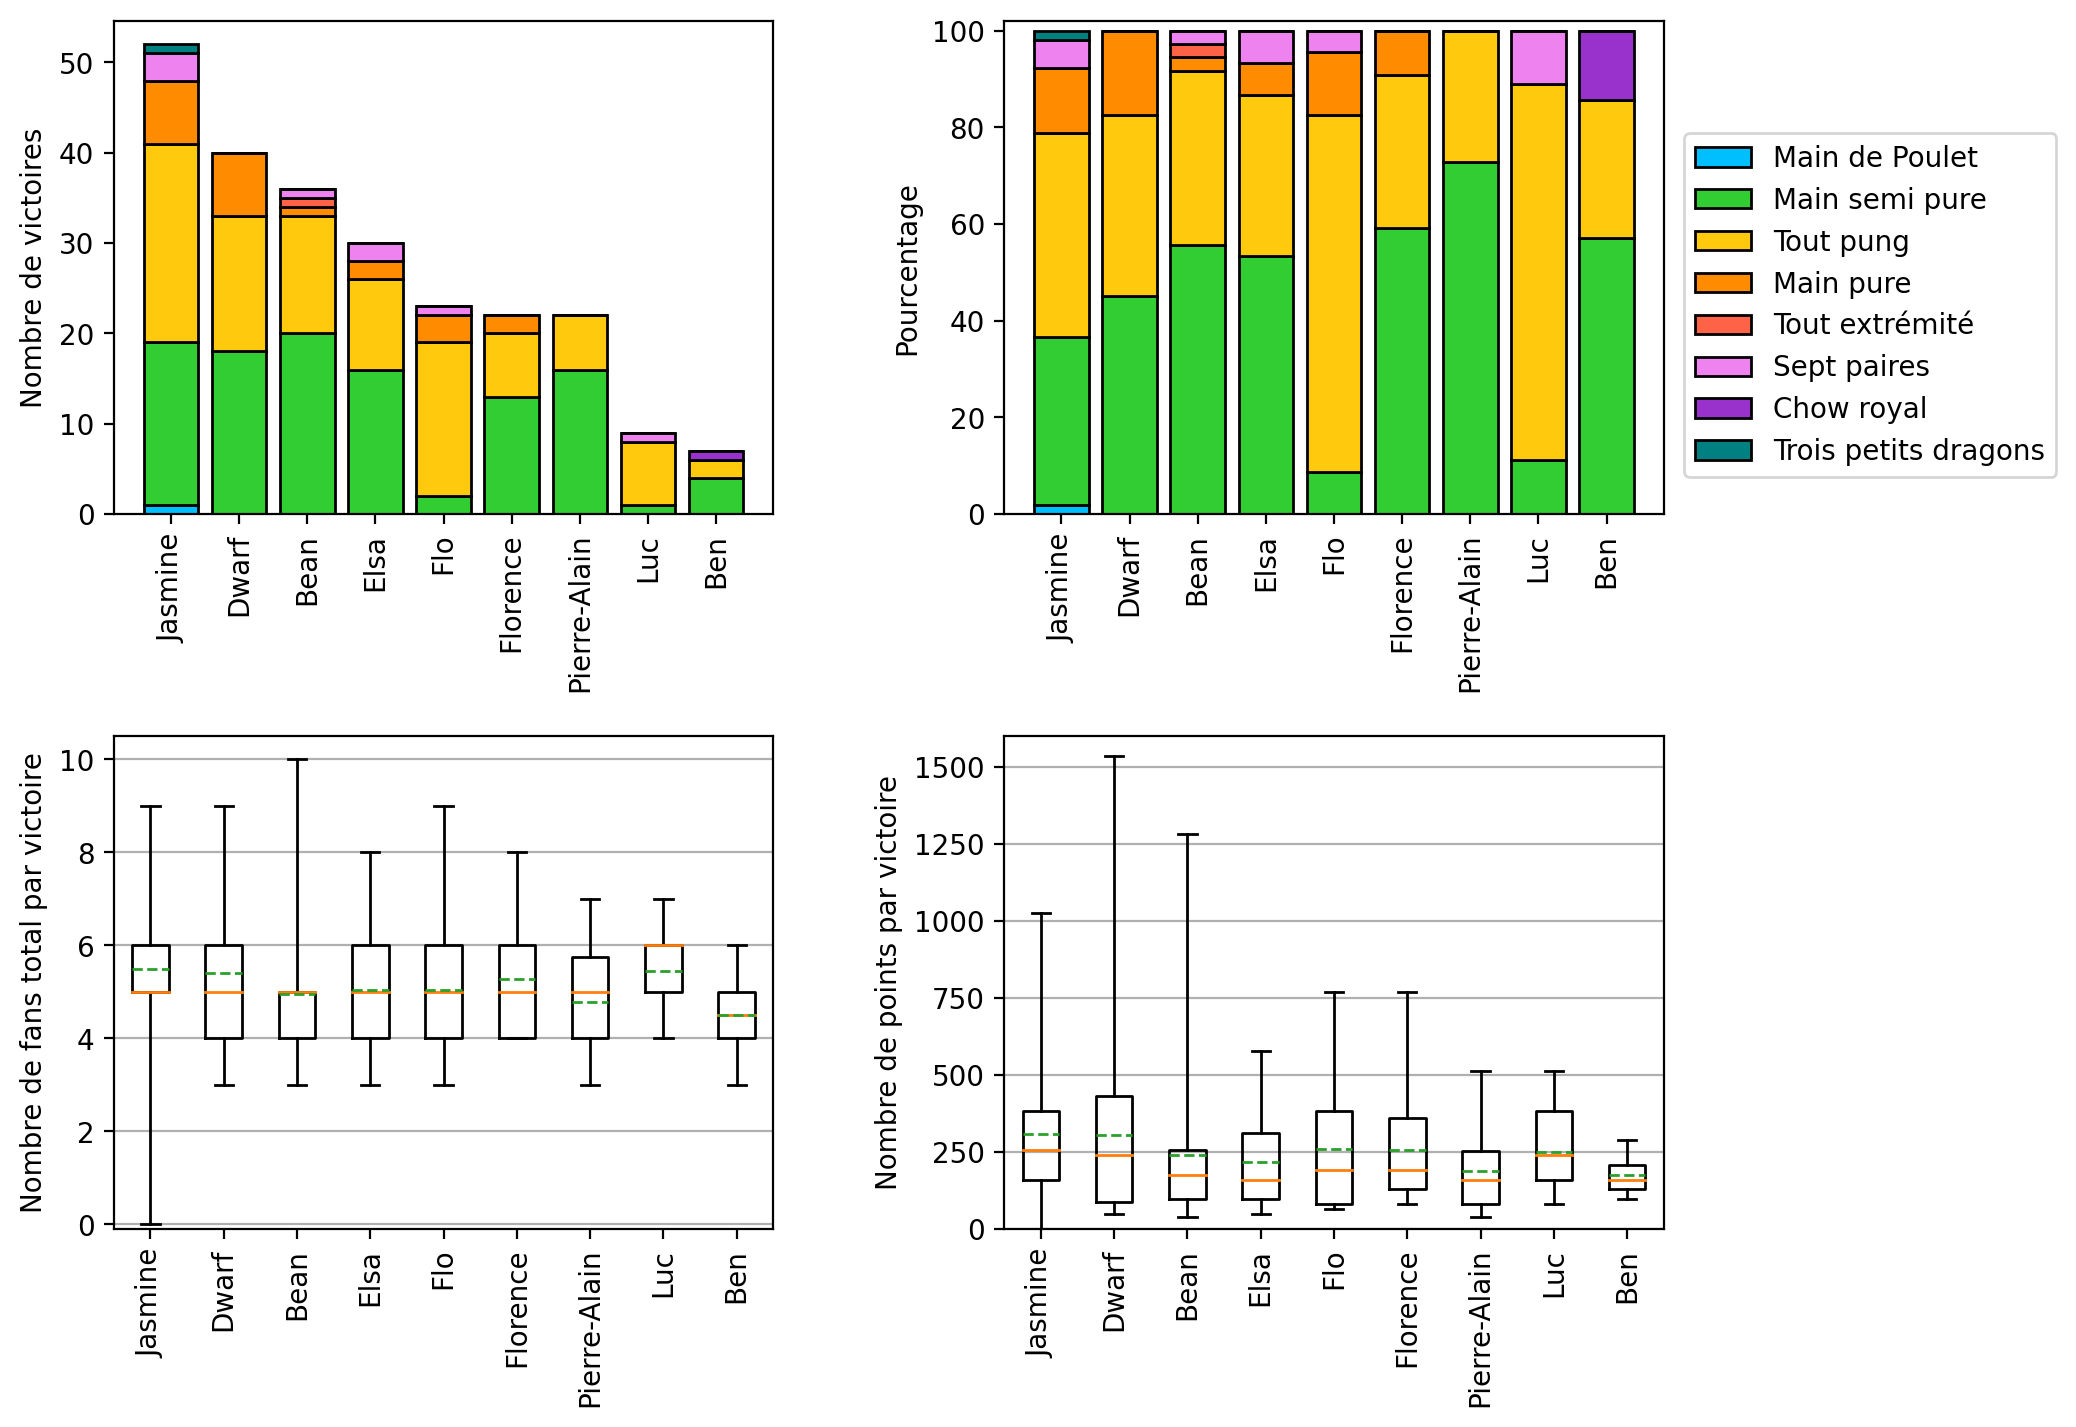

In [8]:
#===========================================================
#=======           Instructions modifiables          =======
#===========================================================
#--- Nombre minimal de parties à avoir fait pour que les statistiques du joueurs soient affichées ---
seuil_nb_parties = 30


"""
Remarque : seuls les joueurs dont les mains ont été enregistrés apparaissent dans les graphiques ci-dessous.
C'est pour cela que Pyves n'apparaît pas.
"""
#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================
#--- Calculs ---
L_gagnants, L_mains, L_mains_joueurs, L_fans_tot, L_points_joueurs = bib.get_mains_joueurs(seuil_nb_parties)

#--- Définition des couleurs ---
coul = ['deepskyblue', 'limegreen', [1,0.788,0.055], 'darkorange', 'tomato', 'violet', 'darkorchid', 'teal']

#--- Tracé des graphiques ---
fig = plt.figure(figsize=(10,8),dpi=200)
fig.subplots_adjust(wspace=0.35, hspace=0.45)

#--- Graphique n°1 : Types de main en fonction du nombre de parties ---
ax = plt.subplot(2,2,1)
barWitdh = 0.8
cumul = np.zeros((len(L_gagnants),))
# Création des labels des axes :
ind = np.arange(len(L_gagnants))
# Création du graphique en barres :
for i in range(len(L_mains)) :
    ax.bar(ind, L_mains_joueurs[i,:], width=barWitdh, bottom=cumul, align='center', color=coul[i%len(coul)], edgecolor='k', linewidth=1, label=L_mains[i])
    cumul += L_mains_joueurs[i,:]
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(L_gagnants, rotation = 90)
#ax.legend(loc='upper right')
plt.ylabel("Nombre de victoires")

#--- Graphique n°2 : Types de main en pourcentage  ---
ax = plt.subplot(2,2,2)
barWitdh = 0.8
cumul = np.zeros((len(L_gagnants),))
# Création des labels des axes :
ind = np.arange(len(L_gagnants))
# Création du graphique en barres :
somme = np.sum(L_mains_joueurs, axis=0)
for i in range(len(L_mains)) :
    valeurs = 100*L_mains_joueurs[i,:]/somme
    ax.bar(ind, valeurs, width=barWitdh, bottom=cumul, align='center', color=coul[i%len(coul)], edgecolor='k', linewidth=1, label=L_mains[i])
    cumul += valeurs
# Affichage des labels des axes :
ax.set_xticks(ind)
ax.set_xticklabels(L_gagnants, rotation = 90)
ax.legend(bbox_to_anchor=(1.01, 0.8))
plt.ylim(0,102)
plt.ylabel("Pourcentage")

#--- Graphique n°3 : Nombre de fans total moyens par joueur ---
ax = plt.subplot(2,2,3)
# Création des labels des axes :
ind = np.arange(len(L_gagnants))
# Création du graphique en boîtes :
ax.boxplot(L_fans_tot, whis=100, showmeans=True, meanline=True)
# Affichage des labels des axes :
ax.set_xticklabels(L_gagnants, rotation = 90)
plt.ylabel("Nombre de fans total par victoire")
plt.ylim(-0.1,10.5)
plt.grid(axis='y')

#--- Graphique n°4 : Nombre de points moyens par joueur lors d'une victoire  ---
ax = plt.subplot(2,2,4)
# Création des labels des axes :
ind = np.arange(len(L_gagnants))
# Création du graphique en boîtes :
ax.boxplot(L_points_joueurs, whis=100, showmeans=True, meanline=True)
# Affichage des labels des axes :
ax.set_xticklabels(L_gagnants, rotation = 90)
plt.ylabel("Nombre de points par victoire")
plt.ylim(-0.1,1600)
plt.grid(axis='y')

plt.show()

(ligne orange : valeur médiane / tirets verts : valeur moyenne)

# Analyse du nombre de tuiles restantes

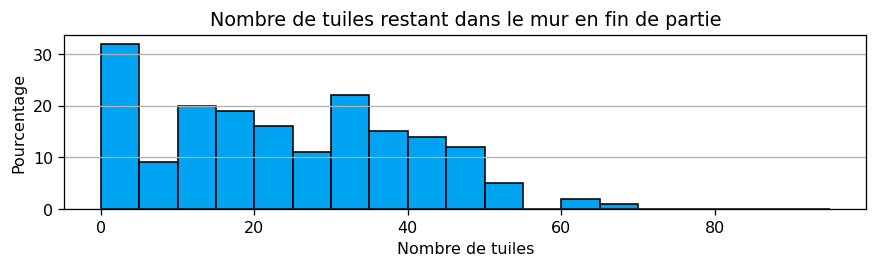

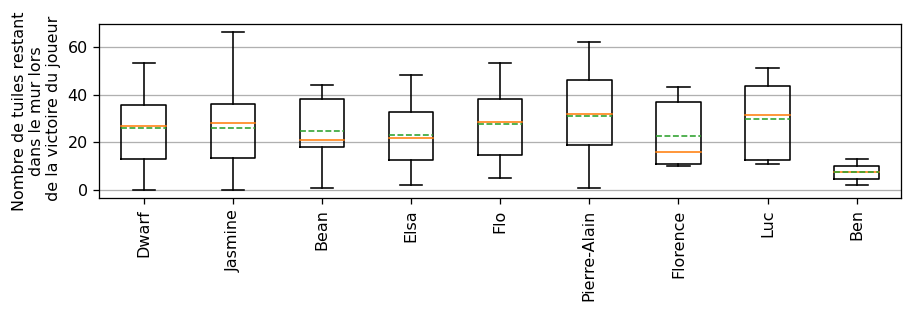

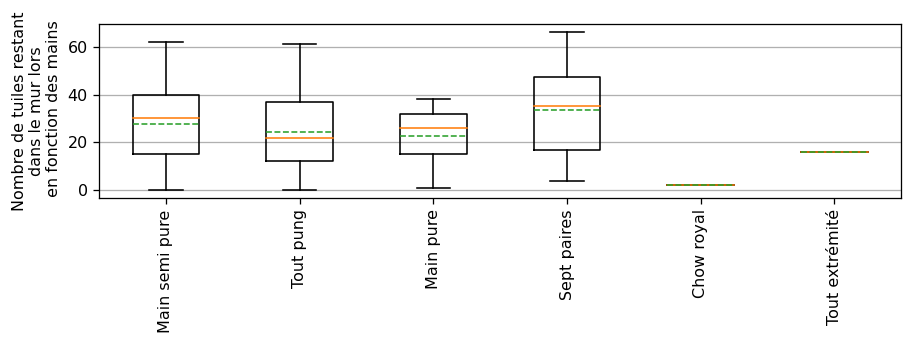

In [9]:
# tuiles restantes en fonction du joueur
# tuiles restantes en fonction de la main


#===========================================================
#=======           Instructions modifiables          =======
#===========================================================
#--- Nombre minimal de parties à avoir fait pour que les statistiques du joueurs soient affichées ---
seuil_nb_parties = 30


#===========================================================
#=======        Instructions à ne pas modifier       =======
#===========================================================
L_nb_tuiles_parties, L_gagnants, L_tuiles_joueurs, L_mains, L_tuiles_mains = bib.get_nb_tuiles_restantes(seuil_nb_parties)

#--- Graphique n°1 : Tuiles restantes pour toutes les parties ---
fig = plt.figure(figsize=(9,2),dpi=115)
ax = plt.subplot(1,1,1)
ax.set_title("Nombre de tuiles restant dans le mur en fin de partie")
# Création de l'histogramme :
ax.hist(L_nb_tuiles_parties, bins=[5*i for i in range(20)], align='mid', color=[0,0.643,0.949], edgecolor='k', linewidth=1)
# Affichage des labels des axes :
plt.xlabel("Nombre de tuiles")
plt.ylabel("Pourcentage")
plt.grid(axis='y')
plt.show()

#--- Graphique n°2 : Tuiles restantes par joueur ---
fig = plt.figure(figsize=(9,2),dpi=115)
ax = plt.subplot(1,1,1)
# Création des labels des axes :
ind = np.arange(len(L_gagnants))
# Création du graphique en boîtes :
ax.boxplot(L_tuiles_joueurs, whis=100, showmeans=True, meanline=True)
# Affichage des labels des axes :
ax.set_xticklabels(L_gagnants, rotation = 90)
plt.ylabel("Nombre de tuiles restant\ndans le mur lors\n de la victoire du joueur")
plt.grid(axis='y')
plt.show()

#--- Graphique n°3 : Tuiles restantes par mains ---
fig = plt.figure(figsize=(9,2),dpi=115)
ax = plt.subplot(1,1,1)
# Création des labels des axes :
ind = np.arange(len(L_gagnants))
# Création du graphique en boîtes :
ax.boxplot(L_tuiles_mains, whis=100, showmeans=True, meanline=True)
# Affichage des labels des axes :
ax.set_xticklabels(L_mains, rotation = 90)
plt.ylabel("Nombre de tuiles restant\ndans le mur lors\n en fonction des mains")
plt.grid(axis='y')
plt.show()
